# Experimental Design Project
> ## Analysis of US Household Pulse Survey

> Research Proposal - https://bit.ly/ExperimentalDesign-ResearchProposal
<br>
> Slide Deck - https://bit.ly/ExperimentalDesign-SlideDeck

In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

mh = pd.read_csv("https://data.cdc.gov/api/views/yni7-er2q/rows.csv")

mh.info()

mh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


* The data was split in order to segregate the "therapy" data.

In [2]:
mh.drop(mh.columns[[1,3,4,5,6,7,8,10,11,12,13,14]], axis=1, inplace=True)
nc = mh[mh['Indicator'] == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
nc_filter=nc.dropna()
nc_filter.info()
nc_filter.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2470 entries, 216 to 10403
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  2470 non-null   object 
 1   State      2470 non-null   object 
 2   Value      2470 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.2+ KB


,Indicator,State,Value
216,Needed Counseling or Therapy But Did Not Get I...,United States,9.2
217,Needed Counseling or Therapy But Did Not Get I...,United States,15.6
218,Needed Counseling or Therapy But Did Not Get I...,United States,12.9
219,Needed Counseling or Therapy But Did Not Get I...,United States,10.0
220,Needed Counseling or Therapy But Did Not Get I...,United States,7.7


### Analysis of location data

* Filtered the data by states FL, AL, and GA to compare Florida with it's bordering states.

In [3]:
states_filter = ['Florida', 'Alabama', 'Georgia']
fl_al_ga = nc[nc['State'].isin(states_filter)]

* Due to the limit number of samples a Kruskal Wallis test will be performed.

In [4]:
stats.kruskal(
    fl_al_ga.loc[fl_al_ga['State'] == 'Florida', ['Value']],
    fl_al_ga.loc[fl_al_ga['State'] == 'Alabama', ['Value']],
    fl_al_ga.loc[fl_al_ga['State'] == 'Georgia', ['Value']])

KruskalResult(statistic=array([15.00896928]), pvalue=array([0.00055061]))

In [5]:
stats.f_oneway(
    fl_al_ga.loc[fl_al_ga['State'] == 'Florida', ['Value']],
    fl_al_ga.loc[fl_al_ga['State'] == 'Alabama', ['Value']],
    fl_al_ga.loc[fl_al_ga['State'] == 'Georgia', ['Value']])

F_onewayResult(statistic=array([9.69726396]), pvalue=array([0.00014592]))

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = fl_al_ga['Value'],
                          groups = fl_al_ga['State'],
                          alpha=0.05) 
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Alabama,Florida,-1.1727,0.0333,-2.27,-0.0755,True
Alabama,Georgia,0.8485,0.1619,-0.2488,1.9458,False
Florida,Georgia,2.0212,0.0001,0.9239,3.1185,True


<Axes: title={'center': 'Value'}, xlabel='State'>

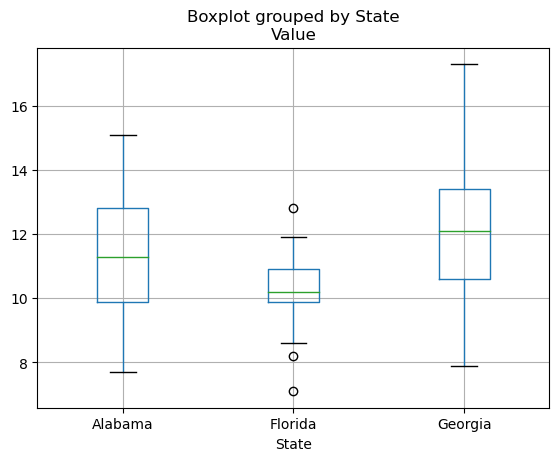

In [7]:
fl_al_ga.boxplot('Value', by='State')

* Based on the H value (Kruskl), F value (ANOVA) and p-values <0.05 the null is rejected and one of the states differs meanifully from the others.
<br>

* The box-plot above gives a visual representation.
<br>
* People in Florida felt like they needed counseling or therapy but did not get it at a lower percentage than the bordering states.
<br>
* There may be bias in this data as florida has a larger elderly and immigrant population. Those are two populations that may under report the need/desire for treatment due to societal/cultural norms and/or may not have the resources to respond to an online survey or the desire to participate in a governmental survey.

### Analysis of sexes data

In [8]:
del mh

mh = pd.read_csv("https://data.cdc.gov/api/views/yni7-er2q/rows.csv")

mh.drop(mh.columns[[1,2,4,5,6,7,8,10,11,12,13,14]], axis=1, inplace=True)

nc = mh[mh['Indicator'] == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
nc_filter=nc.dropna()

In [9]:
substring_mask = nc['Subgroup'].str.contains('Male|Female')
sx_filter = nc.loc[substring_mask]

sx_filter_df=sx_filter.dropna()
sx_filter_df.info()
sx_filter_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 224 to 10333
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  66 non-null     object 
 1   Subgroup   66 non-null     object 
 2   Value      66 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.1+ KB


,Indicator,Subgroup,Value
224,Needed Counseling or Therapy But Did Not Get I...,Male,6.8
225,Needed Counseling or Therapy But Did Not Get I...,Female,11.4
512,Needed Counseling or Therapy But Did Not Get I...,Male,6.9
513,Needed Counseling or Therapy But Did Not Get I...,Female,12.3
800,Needed Counseling or Therapy But Did Not Get I...,Male,7.7


In [10]:
sx_filter_m = sx_filter_df[(sx_filter_df['Subgroup'] == 'Male')]
sx_filter_f = sx_filter_df[(sx_filter_df['Subgroup'] == 'Female')]

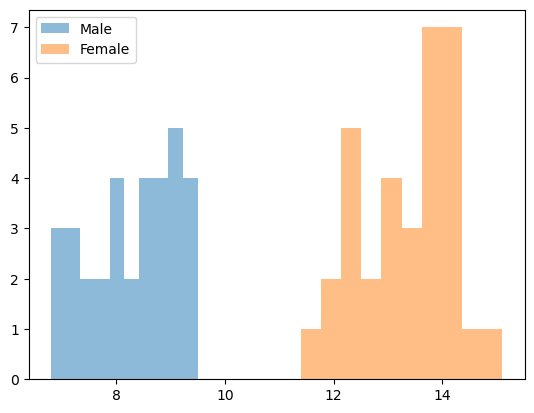

DescribeResult(nobs=33, minmax=(6.8, 9.5), mean=8.303030303030303, variance=0.6846780303030302, skewness=-0.3038340936974422, kurtosis=-1.045439008904589)
DescribeResult(nobs=33, minmax=(6.8, 9.5), mean=8.303030303030303, variance=0.6846780303030302, skewness=-0.3038340936974422, kurtosis=-1.045439008904589)


In [11]:
plt.hist(sx_filter_m['Value'], alpha = .5, label = "Male")
plt.hist(sx_filter_f['Value'], alpha = .5, label = "Female")
plt.legend(loc='upper left')
plt.show()

print(stats.describe(sx_filter_m['Value']))
print(stats.describe(sx_filter_m['Value']))

In [12]:
stats.ttest_ind(sx_filter_m['Value'], sx_filter_f['Value'])

TtestResult(statistic=-24.125286623278345, pvalue=7.740546597565963e-34, df=64.0)

<Axes: title={'center': 'Value'}, xlabel='Subgroup'>

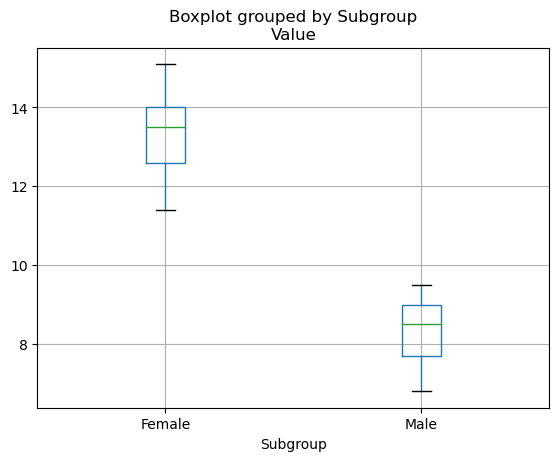

In [13]:
sx_filter_df.boxplot('Value', by='Subgroup')

* The null was rejected and there's a significant difference in the percentage of women to men who felt like they needed counseling or therapy but did not get it.
<br>
* Again there are many possible biases that could occur with this result; such as cultural, gender and ethinic norms.

### Analysis of age data

In [14]:
del mh

mh = pd.read_csv("https://data.cdc.gov/api/views/yni7-er2q/rows.csv")

mh.drop(mh.columns[[1,2,4,5,6,7,8,10,11,12,13,14]], axis=1, inplace=True)

nc = mh[mh['Indicator'] == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
nc_filter=nc.dropna()

In [15]:
substring_mask = nc['Subgroup'].str.contains('18 - 29 years|30 - 39 years|40 - 49 years|50 - 59 years|60 - 69 years|70 - 79 years|80 years and above')
age_filter = nc.loc[substring_mask]

age_filter.info()
age_filter.head(7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 217 to 10331
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  266 non-null    object 
 1   Subgroup   266 non-null    object 
 2   Value      224 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.3+ KB


,Indicator,Subgroup,Value
217,Needed Counseling or Therapy But Did Not Get I...,18 - 29 years,15.6
218,Needed Counseling or Therapy But Did Not Get I...,30 - 39 years,12.9
219,Needed Counseling or Therapy But Did Not Get I...,40 - 49 years,10.0
220,Needed Counseling or Therapy But Did Not Get I...,50 - 59 years,7.7
221,Needed Counseling or Therapy But Did Not Get I...,60 - 69 years,5.3
222,Needed Counseling or Therapy But Did Not Get I...,70 - 79 years,2.9
223,Needed Counseling or Therapy But Did Not Get I...,80 years and above,1.4


In [16]:
age_filter_df=age_filter.dropna()

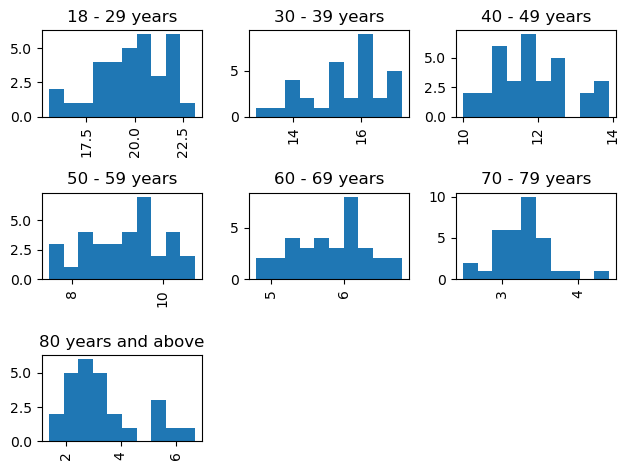

In [17]:
age_filter_df['Subgroup'].unique()
age_filter_df['Value'].hist(by = age_filter_df['Subgroup'])
plt.tight_layout()
plt.show()

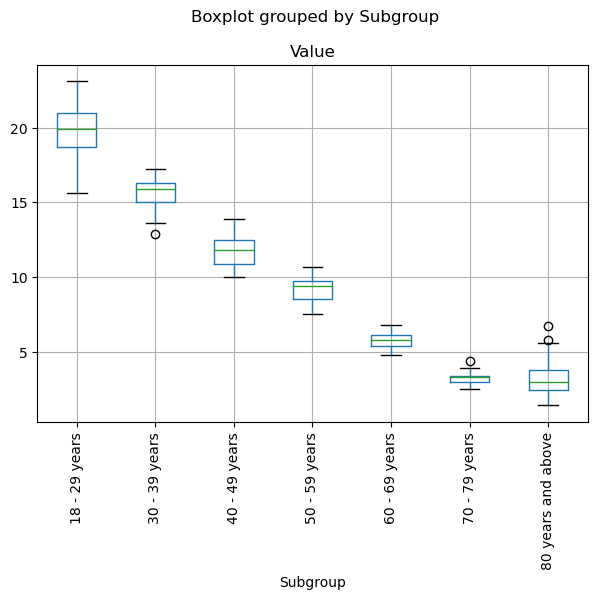

In [18]:
age_filter_df.boxplot('Value', by='Subgroup')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [19]:
stats.kruskal(
    age_filter_df.loc[age_filter_df['Subgroup'] == '18 - 29 years', ['Value']],
    age_filter_df.loc[age_filter_df['Subgroup'] == '30 - 39 years', ['Value']],
    age_filter_df.loc[age_filter_df['Subgroup'] == '40 - 49 years', ['Value']],
    age_filter_df.loc[age_filter_df['Subgroup'] == '50 - 59 years', ['Value']],
    age_filter_df.loc[age_filter_df['Subgroup'] == '60 - 69 years', ['Value']],
    age_filter_df.loc[age_filter_df['Subgroup'] == '70 - 79 years', ['Value']],
    age_filter_df.loc[age_filter_df['Subgroup'] == '80 years and above', ['Value']]
)

KruskalResult(statistic=array([212.81528071]), pvalue=array([3.53856323e-43]))

* The null is rejected and there's a significant difference among the age groups.
<br>
* Again it can be said that biases may have occurred in the data.